# Looking for the inversion in the radiosonde measurement

*Data is entered manually, for now. Found at Wyoming Sounding website.*

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint

In [2]:
date_str = "20240620"
datetime_str = "2024-06-20 00Z"

latitude = 43.8
longitude = -66.1

In [3]:
if date_str == "20240620":
    pressure_levels = [1023, 1008, 1001, 1000, 999, 990, 988.4, 971.0, 954.4, 952, 925, 921.8, 890, 884, 859.1, 850, 829.1, 823, 819, 801, 800.1, 783, 771.9, 770, 748, 744.5, 717.8, 700]
    mix_ratio = [10.86, 10.74, 10.82, 11.19, 11.28, 12.38, 12.62, 15.50, 14.68, 14.56, 14.43, 14.35, 13.52, 13.36, 11.09, 10.33, 8.87, 8.47, 10.87, 10.12, 10, 8.09, 6.46, 6.2, 4.99, 4.98, 4.88, 4.81]
    temperatures = [17.4, 16.0, 16.4, 17.2, 18.4, 20.8, 20.9, 22.2, 23.6, 23.8, 22.4, 22.2, 20.5, 20.2, 19.2, 18.8, 17.7, 17.4, 17, 15.6, 15.6, 15.0, 15.0, 15.0, 13.6, 13.3, 10.9, 9.2]

In [4]:
sst_file = "sst_data/sst_"+date_str

sst_ds = xr.open_dataset(sst_file)
sst_ds =  sst_ds.squeeze()

#--- Convert from C to K
sst_ds.sst.values = sst_ds.sst.values+273.15

In [5]:
surface = sst_ds.sel(lat=latitude, lon=longitude+360, method='nearest')

In [6]:
pressure = pressure_levels
surface_temperature = float(surface.sst.values)
temperature = temperatures

pressure = pressure * units.hPa
temperature = temperature * units.degC


In [7]:
#--- Converting from specific humidity to dewpoint
mix_ratio_g_kg = (mix_ratio * units('g/kg'))
mix_ratio_kg_kg = mix_ratio_g_kg.to('kg/kg') 

vapor_pressure = (mix_ratio_kg_kg * pressure) / (0.622 + mix_ratio_kg_kg)
dewpoints = dewpoint(vapor_pressure)

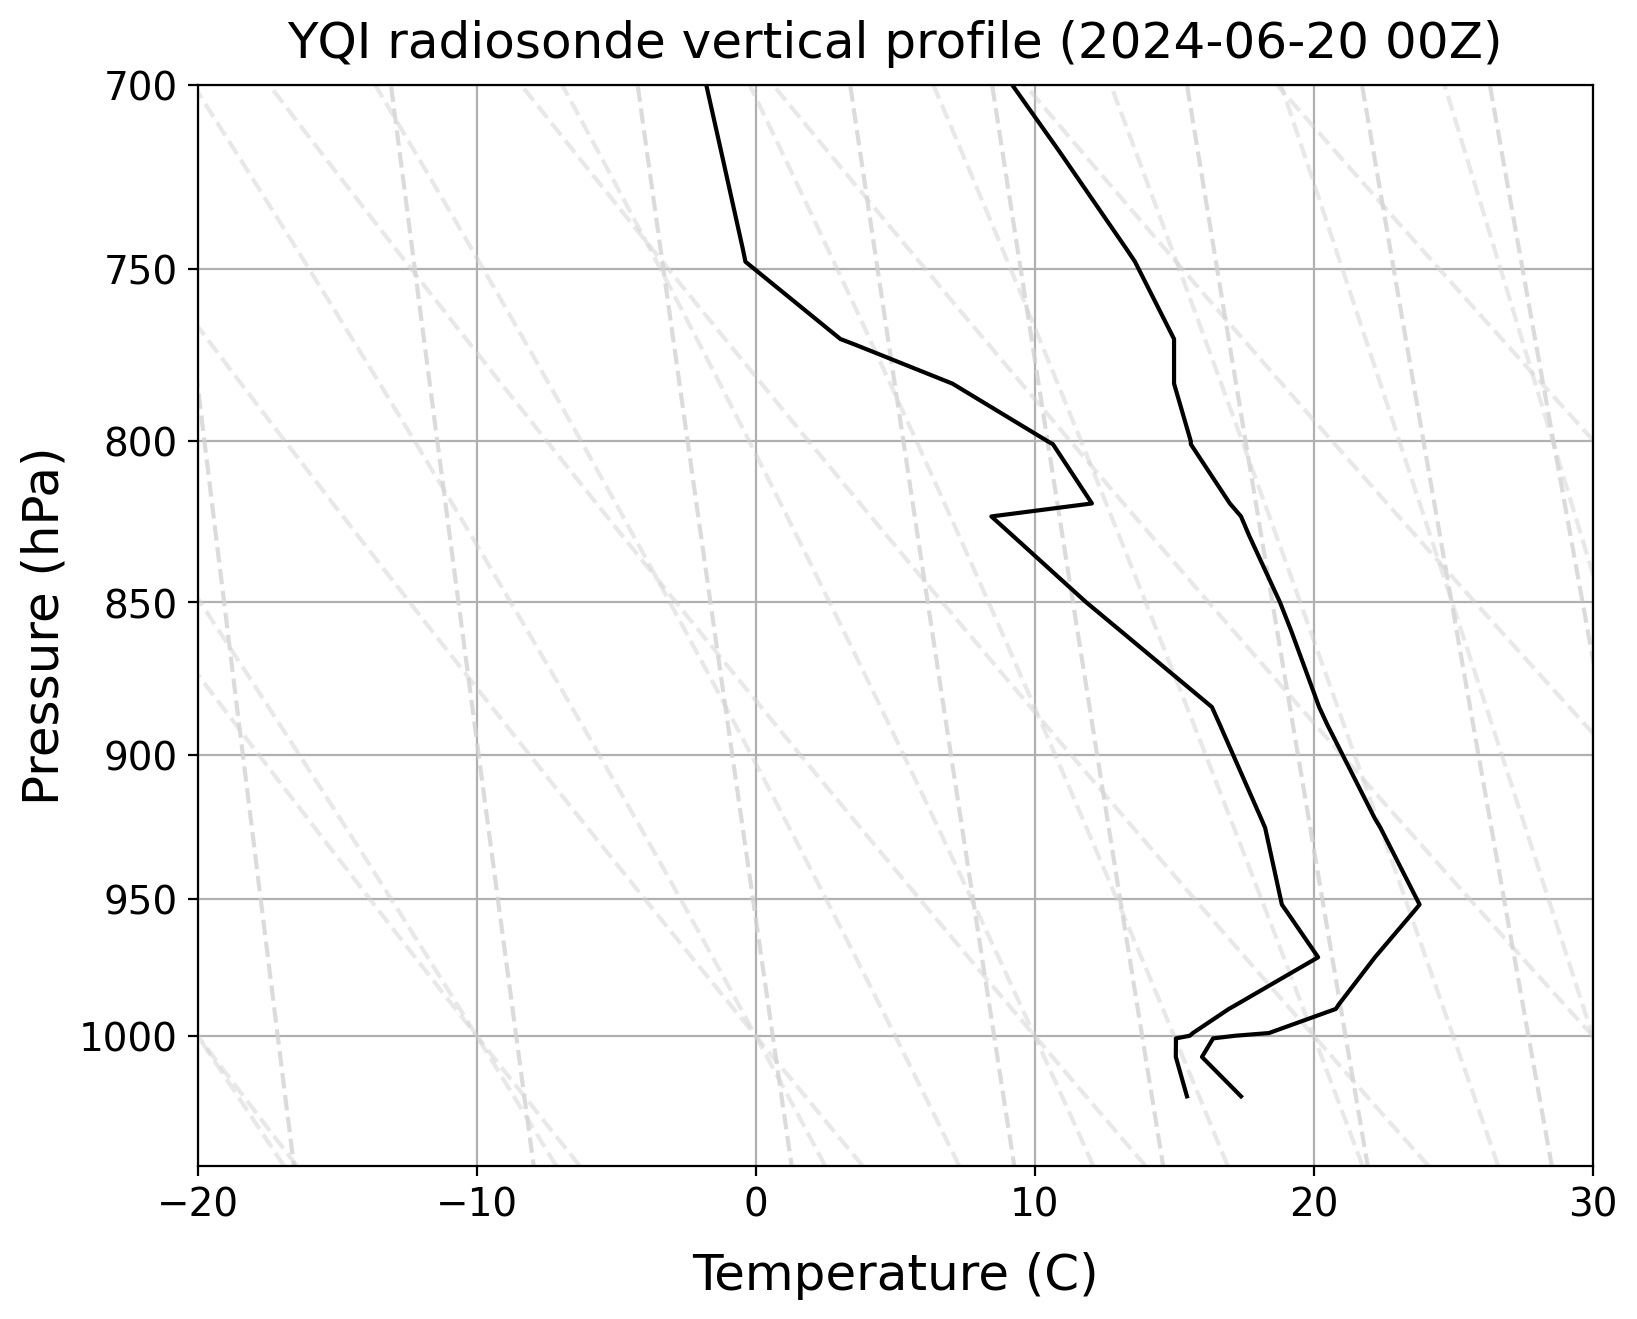

In [8]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, aspect=220, rotation=0)

# Plot the data
skew.plot(pressure, temperature, 'k', label='Temperature')
skew.plot(pressure, dewpoints, 'k', label='Dewpoint')

# Add additional lines (like dry adiabats, moist adiabats, and mixing ratio lines)
skew.plot_dry_adiabats(colors='lightgray')
skew.plot_moist_adiabats(colors='lightgray')
skew.plot_mixing_lines(colors='lightgray')

# Set plot limits and labels
skew.ax.set_ylim(1050, 700)
skew.ax.set_yticks(np.arange(1000, 700 - 1, -50))
skew.ax.set_xlim(-20, 30)
skew.ax.set_xlabel('Temperature (C)', size=18, labelpad=10)
skew.ax.set_ylabel('Pressure (hPa)', size=18)
skew.ax.tick_params(axis='both', which='major', labelsize=14)

skew.ax.set_title('YQI radiosonde vertical profile ('+ datetime_str+')', size=18, pad=10)
# Show the plot
fig.set_dpi(200)
plt.show()